# FM Features
## Load Data
codes are

1	move right hand

2	move left hand

3	make right fist

4	make left fist

5	hug

6	move feet

7	stand up

8	music

9	taste

10	touch

11	calculate

In [1]:
import mne
import peakfrequency.peak_frequency as pf
from mne.channels.layout import _auto_topomap_coords as pos_from_raw
import numpy as np
import matplotlib.pyplot as plt

# Load data
path = "data/"
raw = mne.io.read_raw_brainvision(path + "20191210_Cybathlon_SAZ_Session1.vhdr", preload=True)
# Set montage (location of channels)
raw.rename_channels({'O9': 'I1', 'O10': 'I2'})
montage = mne.channels.read_montage("standard_1005")
raw.set_montage(montage)
raw.rename_channels({'I1': 'O9', 'I2': 'O10'})
# Remove bad channels from analysis

raw.info['bads'] = []
picks = mne.pick_types(raw.info, eeg=True, stim=False, exclude='bads')
fs = int(1/raw.times[1])
# Create events from triggers
events = mne.events_from_annotations(raw)[0]
# Epoch data (cut up data into trials)
tmin = 1            # time in seconds after trigger the trial should start
tmax = tmin + 5     # time in seconds after trigger the trial should end
epochs = mne.Epochs(raw, events, tmin=tmin, tmax=tmax, preload=True, baseline=None)
#data_lhand = epochs['1'].get_data()
#data_rhand = epochs['2'].get_data()
#nr_channels = data_rhand[0].shape[0]

Extracting parameters from data/20191210_Cybathlon_SAZ_Session1.vhdr...
Setting channel info structure...
Reading 0 ... 2419277  =      0.000 ...  4838.554 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S  7', 'Stimulus/S  8', 'Stimulus/S  9', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 30', 'Stimulus/S 31', 'Stimulus/S 32', 'Stimulus/S 40']
338 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 338 events and 2501 original time points ...
0 bad epochs dropped


/home/biropo/anaconda3/envs/signalprocessing/lib/python3.7/site-packages/mne/utils/docs.py:830: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/home/biropo/anaconda3/envs/signalprocessing/lib/python3.7/site-packages/mne/utils/docs.py:813: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-1-0eb13f172d71>:13: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Ple

In [21]:
data = epochs['11'].get_data()
title = 'calculate'
nr_channels = data[0].shape[0]

## Topograpy Maps
*Alpha range, via trial, FM features*

In [3]:
bands = {'Delta': (1.0, 4.0, 'Delta (1 , 4)'), 'Theta': (4.0, 9.0, 'Theta (4.0 , 9)'), 'Alpha': (9.0, 12.0, 'Alpha (9 , 12)'), 'Beta': (12.0, 30.0, 'Beta (12 , 30.0)'), 'Gamma': (30.0, 45.0, 'Gamma (30 , 45)')}

In [8]:
def plot_single_topomap(data, pos, vmin=None, vmax=None, title=None, cmap_rb=False):
    vmin = np.min(data) if vmin is None else vmin
    vmax = np.max(data) if vmax is None else vmax
    fig, ax  = plt.subplots()
    im, _ = mne.viz.topomap.plot_topomap(data, pos, vmin=vmin, vmax=vmax, axes=ax, image_interp='bilinear', contours=0, outlines='skirt', show=False)
    cbar, cax = mne.viz.topomap._add_colorbar(ax, im, None, pad=.25, title=None,
                                  size="10%", format='%3.3f')
    cbar.set_ticks((vmin, vmax))
    ax.set_title(title)
    plt.savefig(title+".png", dpi=150)

fm = pf.PeakFrequency(nr_channels, data_lhand.shape[2], fs, bands)
acum_y = []
acum_x = []
left =[]
right = []
for i in range(data_lhand.shape[0]):
    peaks_l = fm.transform(data_lhand[i,:,:].T, 'median')
    peaks_r = fm.transform(data_rhand[i,:,:].T, 'median')
    #pos = pos_from_raw(raw.info, picks)
    #plot_single_topomap(peaks_l['Alpha'], pos, title = bands['Alpha'][2]+' - left, trial'+str(i), cmap_rb=True)
    #plot_single_topomap(peaks_r['Alpha'], pos, title = bands['Alpha'][2]+' - right, trial'+str(i), cmap_rb=True)
    acum_y.append(peaks_l['Alpha'])
    acum_x.append(0)
    acum_y.append(peaks_r['Alpha'])
    acum_x.append(1)
    left.append(peaks_l['Alpha'])
    right.append(peaks_r['Alpha'])
left = np.array(left)
right = np.array(right)

## Correlation Plots
*Alpha range*


In [4]:
y = np.array(acum_y)
print(y.shape)

(30, 126)


mean:  0.17350478751445278
var in mean:  0.01091029307122032


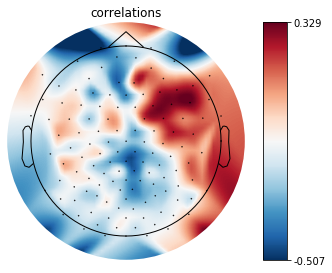

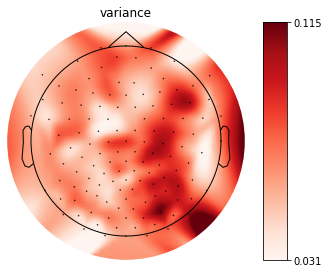

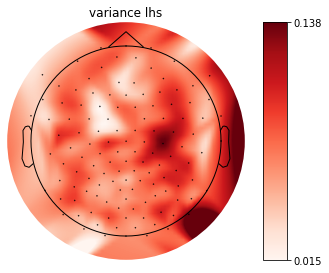

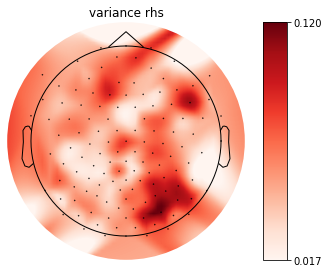

In [9]:

y = np.array(acum_y)
val= []
var = []
var_left = []
var_right = []
for i in range(y.shape[1]):
    corr = np.corrcoef(acum_x, y[:, i])
    var.append(np.var(y[:,i]))
    var_left.append(np.var(left[:,i]))
    var_right.append(np.var(right[:,i]))
    val.append(corr[0][1])
print('mean: ', np.mean(np.abs(val)))
print('var in mean: ', np.var(np.abs(val)))
pos = pos_from_raw(raw.info, picks)
plot_single_topomap(val, pos, title = 'correlations', cmap_rb=True)
plot_single_topomap(var, pos, title = 'variance', cmap_rb=True)

plot_single_topomap(var_left, pos, title = 'variance lhs', cmap_rb=True)
plot_single_topomap(var_right, pos, title = 'variance rhs', cmap_rb=True)

## Boxplots

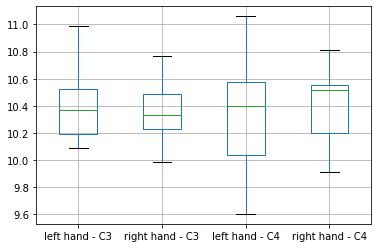

In [6]:
import pandas as pd

l_C3 = left[:, 4]
l_C4 = left[:, 5]
r_C3 = right[:, 4]
r_C4 = right[:, 5]

df = pd.DataFrame(data=[l_C3, r_C3, l_C4, r_C4], index=['left hand - C3', 'right hand - C3', 'left hand - C4', 'right hand - C4']).T
df.boxplot()
plt.savefig("boxplot_hands.png", dpi=150)

In [24]:
import peakfrequency.peak_frequency as pf
def plot_single_topomap(data, pos, vmin=None, vmax=None, title=None, cmap_rb=False):
    vmin = np.min(data) if vmin is None else vmin
    vmax = np.max(data) if vmax is None else vmax
    fig, ax  = plt.subplots()
    im, _ = mne.viz.topomap.plot_topomap(data, pos, vmin=vmin, vmax=vmax, axes=ax, image_interp='bilinear', contours=0, outlines='skirt', show=False)
    cbar, cax = mne.viz.topomap._add_colorbar(ax, im, None, pad=.25, title=None,
                                  size="10%", format='%3.3f')
    cbar.set_ticks((vmin, vmax))
    ax.set_title(title)
    plt.savefig(title+".png", dpi=150)

fm = pf.PeakFrequency(nr_channels, data.shape[2], fs, bands)
#acum_y = []
#acum_x = []
#left =[]
#right = []
peaks_delta = []
peaks_theta = []
peaks_alpha = []
peaks_beta = []
peaks_gamma = []
for i in range(data.shape[0]):
    technique = 'median'
    peak = fm.transform(data[i,:,:].T, technique)
    peaks_delta.append(peak['Delta'])
    peaks_theta.append(peak['Theta'])
    peaks_alpha.append(peak['Alpha'])
    peaks_beta.append(peak['Beta'])
    peaks_gamma.append(peak['Gamma'])
    #for b in bands:
    #    pos = pos_from_raw(raw.info, picks)
    #    plot_single_topomap(peak[b], pos, title = title+' '+technique+' '+bands[b][2]+', trial '+str(i), cmap_rb=True)
    #peaks_l = fm.transform(data_lhand[i,:,:].T, 'rms')
    #peaks_r = fm.transform(data_rhand[i,:,:].T, 'rms')
    #plot_single_topomap(peaks_l['Alpha'], pos, title = bands['Alpha'][2]+' - left, trial'+str(i), cmap_rb=True)
    #plot_single_topomap(peaks_r['Alpha'], pos, title = bands['Alpha'][2]+' - right, trial'+str(i), cmap_rb=True)
    #acum_y.append(peaks_l['Alpha'])
    #acum_x.append(0)
    #acum_y.append(peaks_r['Alpha'])
    #acum_x.append(1)
    #left.append(peaks_l['Alpha'])
    #right.append(peaks_r['Alpha'])
#left = np.array(left)
#right = np.array(right)

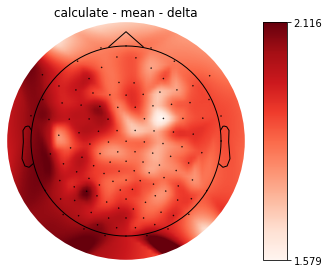

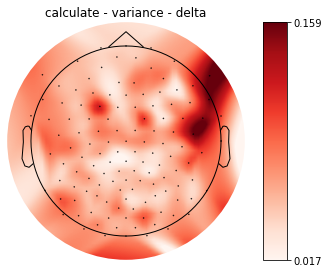

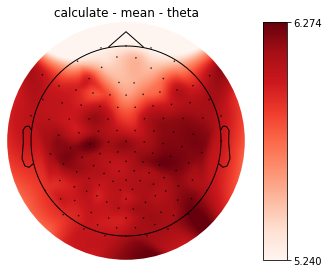

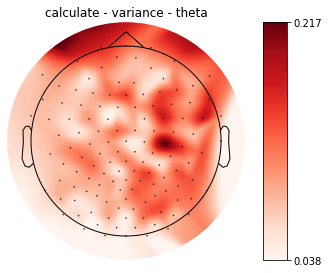

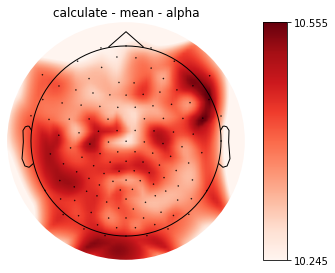

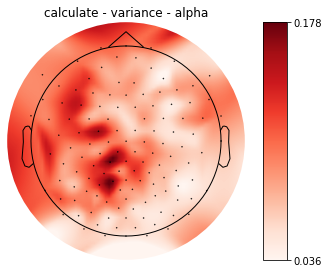

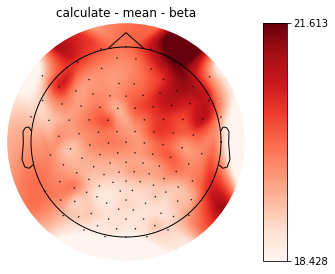

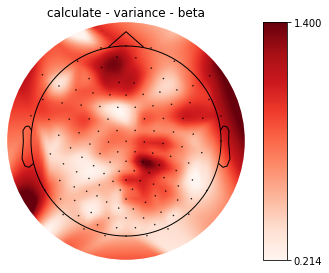

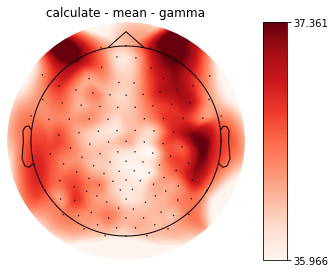

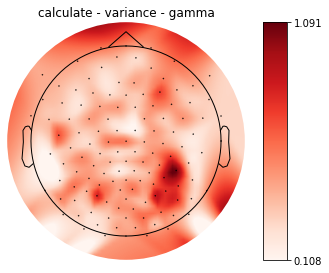

In [25]:
pos = pos_from_raw(raw.info, picks)

peaks = np.array(peaks_delta)
mean = np.mean(peaks, axis=0)
var = np.var(peaks, axis=0)
plot_single_topomap(mean, pos, title = title+' - mean - delta', cmap_rb=True)
plot_single_topomap(var, pos, title = title+' - variance - delta', cmap_rb=True)

peaks = np.array(peaks_theta)
mean = np.mean(peaks, axis=0)
var = np.var(peaks, axis=0)
plot_single_topomap(mean, pos, title = title+' - mean - theta', cmap_rb=True)
plot_single_topomap(var, pos, title = title+' - variance - theta', cmap_rb=True)

peaks = np.array(peaks_alpha)
mean = np.mean(peaks, axis=0)
var = np.var(peaks, axis=0)
plot_single_topomap(mean, pos, title = title+' - mean - alpha', cmap_rb=True)
plot_single_topomap(var, pos, title = title+' - variance - alpha', cmap_rb=True)

peaks = np.array(peaks_beta)
mean = np.mean(peaks, axis=0)
var = np.var(peaks, axis=0)
plot_single_topomap(mean, pos, title = title+' - mean - beta', cmap_rb=True)
plot_single_topomap(var, pos, title = title+' - variance - beta', cmap_rb=True)

peaks = np.array(peaks_gamma)
mean = np.mean(peaks, axis=0)
var = np.var(peaks, axis=0)
plot_single_topomap(mean, pos, title = title+' - mean - gamma', cmap_rb=True)
plot_single_topomap(var, pos, title = title+' - variance - gamma', cmap_rb=True)